In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
#Import csv files

AC_Power = pd.read_csv("../data/Data_9068/9068_ac_power_data_20240101_20250430.csv")
Irradiance = pd.read_csv("../data/Data_9068/9068_irradiance_data_20240101_20250430.csv")
Weather = pd.read_csv("../data/NREL_Weather/1000190_40.38_-104.55_2024.csv",header=2)

In [13]:
AC_Power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137249 entries, 0 to 137248
Data columns (total 13 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   measured_on                                   137249 non-null  object 
 1   inverter_module_1.1_ac_power_(kw)_inv_150135  137166 non-null  float64
 2   inverter_module_1.2_ac_power_(kw)_inv_150136  137166 non-null  float64
 3   inverter_module_1.3_ac_power_(kw)_inv_150137  137166 non-null  float64
 4   inverter_module_1.4_ac_power_(kw)_inv_150138  137166 non-null  float64
 5   inverter_module_2.1_ac_power_(kw)_inv_150139  135874 non-null  float64
 6   inverter_module_2.2_ac_power_(kw)_inv_150140  135874 non-null  float64
 7   inverter_module_2.3_ac_power_(kw)_inv_150141  135874 non-null  float64
 8   inverter_module_2.4_ac_power_(kw)_inv_150142  135874 non-null  float64
 9   inverter_1_ac_power_(kw)_inv_150143           13

In [14]:
Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Year                   105120 non-null  int64  
 1   Month                  105120 non-null  int64  
 2   Day                    105120 non-null  int64  
 3   Hour                   105120 non-null  int64  
 4   Minute                 105120 non-null  int64  
 5   Temperature            105120 non-null  float64
 6   Alpha                  105120 non-null  float64
 7   Aerosol Optical Depth  105120 non-null  float64
 8   Asymmetry              105120 non-null  float64
 9   Clearsky DHI           105120 non-null  int64  
 10  Clearsky DNI           105120 non-null  int64  
 11  Clearsky GHI           105120 non-null  int64  
 12  Cloud Fill Flag        105120 non-null  int64  
 13  Cloud Type             105120 non-null  int64  
 14  Dew Point              105120 non-nu

In [15]:
#Restrict 9068 site data to 2024 and convert time to pandas Timestamp

AC_Power["measured_on"] = pd.to_datetime(AC_Power["measured_on"])
AC_Power = AC_Power[AC_Power["measured_on"].dt.year ==  2024]

Irradiance["measured_on"] = pd.to_datetime(Irradiance["measured_on"])
Irradiance = Irradiance[Irradiance["measured_on"].dt.year ==  2024]

In [26]:
AC_Power.sample(3)

measured_on  inverter_module_1.1_ac_power_(kw)_inv_150135  \
89615 2024-11-14 23:20:00                                           0.0   
14406 2024-02-20 00:35:00                                           0.0   
18480 2024-03-05 04:05:00                                           0.0   

       inverter_module_1.2_ac_power_(kw)_inv_150136  \
89615                                           0.0   
14406                                           0.0   
18480                                           0.0   

       inverter_module_1.3_ac_power_(kw)_inv_150137  \
89615                                           0.0   
14406                                           0.0   
18480                                           0.0   

       inverter_module_1.4_ac_power_(kw)_inv_150138  \
89615                                           0.0   
14406                                           0.0   
18480                                           0.0   

       inverter_module_2.1_ac_power_(kw)_inv_150139  \
89615                                           0.0   
14406                                           0.0   
18480                                           0.0   

       inverter_module_2.2_ac_power_(kw)_inv_150140  \
89615                                           0.0   
14406                                           0.0   
18480                                           0.0   

       inverter_module_2.3_ac_power_(kw)_inv_150141  \
89615                                           0.0   
14406                                           0.0   
18480                                           0.0   

       inverter_module_2.4_ac_power_(kw)_inv_150142  \
89615                                           0.0   
14406                                           0.0   
18480                                           0.0   

       inverter_1_ac_power_(kw)_inv_150143  \
89615                                  0.0   
14406                                  0.0   
18480                                  0.0   

       inverter_2_ac_power_(kw)_inv_150144  \
89615                                  0.0   
14406                                  0.0   
18480                                  0.0   

       inverter_1_power_factor_inv_150145  inverter_2_power_factor_inv_150146  \
89615                                 0.0                                0.00   
14406                                 0.0                                0.00   
18480                                 0.0                               -0.14   

       Power  
89615    0.0  
14406    0.0  
18480    0.0

In [ ]:
#Create/merge weather time columns into pandas Timestamp
#No data provided for leap day 29 February
Weather["DateTime"] = pd.to_datetime(Weather[["Year","Month","Day","Hour","Minute"]])
Weather.drop(columns=["Year","Month","Day","Hour","Minute"], inplace = True)

In [25]:
Weather.sample(3)

Temperature  Alpha  Aerosol Optical Depth  Asymmetry  Clearsky DHI  \
56298          36.1   1.83                  0.138       0.62           131   
102354         11.7   1.36                  0.019       0.62            46   
50416          21.3   1.60                  0.065       0.61             0   

        Clearsky DNI  Clearsky GHI  Cloud Fill Flag  Cloud Type  Dew Point  \
56298            886           962                0           3        8.4   
102354           854           304                0           7       -6.5   
50416              0             0                0           1        9.8   

        ...  Ozone  Relative Humidity  Solar Zenith Angle   SSA  \
56298   ...  0.292              18.40               20.37  0.94   
102354  ...  0.269              27.45               72.37  0.90   
50416   ...  0.314              47.93              113.65  0.92   

        Surface Albedo  Pressure  Precipitable Water  Wind Direction  \
56298             0.20       855                 2.7              24   
102354            0.22       853                 0.7             297   
50416             0.21       853                 2.0             265   

        Wind Speed            DateTime  
56298          3.9 2024-07-15 11:30:00  
102354         3.4 2024-12-22 09:30:00  
50416          1.6 2024-06-25 01:20:00  

[3 rows x 24 columns]

In [ ]:
#Combine inverter power output readings and remove other columns and missing data
AC_Power["Power"] = AC_Power[["inverter_1_ac_power_(kw)_inv_150143","inverter_2_ac_power_(kw)_inv_150144"]].sum(axis=1)
AC_Power.dropna(inplace=True)
Power = AC_Power.drop(columns=AC_Power.columns[1:-1])
Power.sample(3)

measured_on  Power
93086 2024-11-27 00:35:00    0.0
38043 2024-05-13 20:40:00    0.0
74646 2024-09-22 21:25:00    0.0

In [ ]:
#Merge into one dataframe based on matching timestamps
#Any missing times in at least one data (e.g. 2024-02-29 in Weather) are removed
Merged_data = pd.merge(Power,Irradiance,left_on="measured_on",right_on="measured_on",how="inner")
Merged_data = pd.merge(Merged_data,Weather,left_on="measured_on",right_on="DateTime",how="inner")
Merged_data.drop(columns=["measured_on"],inplace=True)

In [23]:
Merged_data.sample(3)

Power  pyranometer_(class_a)_pad_1_poa_irradiance_(w/m2)_o_149723  \
46278  3312.0                                             883.55            
91599   389.0                                             164.58            
7501      0.0                                              -1.30            

       pyranometer_(class_a)_pad_1_poa_irradiance_temp_compensated_(w/m2)_o_149724  \
46278                                             883.56                             
91599                                             164.23                             
7501                                               -1.32                             

       pyranometer_(class_a)_pad_2_poa_irradiance_(w/m2)_o_149725  \
46278                                             868.94            
91599                                             112.62            
7501                                               -1.43            

       pyranometer_(class_a)_pad_2_poa_irradiance_temp_compensated_(w/m2)_o_149726  \
46278                                             868.98                             
91599                                             112.95                             
7501                                               -1.44                             

       Temperature  Alpha  Aerosol Optical Depth  Asymmetry  Clearsky DHI  \
46278         26.8   1.24                  0.064       0.61            81   
91599          2.6   1.57                  0.018       0.61            35   
7501          -2.4   1.30                  0.020       0.62             0   

       ...  Ozone  Relative Humidity  Solar Zenith Angle   SSA  \
46278  ...  0.323              25.63               51.51  0.91   
91599  ...  0.308              43.36               79.18  0.91   
7501   ...  0.353              59.37              136.84  0.92   

       Surface Albedo  Pressure  Precipitable Water  Wind Direction  \
46278            0.21       849                 1.5              55   
91599            0.22       855                 0.5             340   
7501             0.21       862                 0.6             294   

       Wind Speed            DateTime  
46278         3.7 2024-06-16 08:05:00  
91599         2.9 2024-11-27 15:20:00  
7501          2.3 2024-01-27 03:05:00  

[3 rows x 29 columns]

In [27]:
#Create separate dataframes for each hour
Hourly_Dict = {}
for hour in range(24):
    Hourly_Dict[hour] = Merged_data[Merged_data["DateTime"].dt.hour == hour]

In [29]:
Hourly_Dict[15].sample(3)

Power  pyranometer_(class_a)_pad_1_poa_irradiance_(w/m2)_o_149723  \
20314  2963.0                                             720.62            
22902  3487.0                                             911.46            
7069    774.0                                             209.42            

       pyranometer_(class_a)_pad_1_poa_irradiance_temp_compensated_(w/m2)_o_149724  \
20314                                             720.98                             
22902                                             911.55                             
7069                                              209.72                             

       pyranometer_(class_a)_pad_2_poa_irradiance_(w/m2)_o_149725  \
20314                                             830.64            
22902                                             941.43            
7069                                              208.48            

       pyranometer_(class_a)_pad_2_poa_irradiance_temp_compensated_(w/m2)_o_149726  \
20314                                             829.79                             
22902                                             941.99                             
7069                                              208.56                             

       Temperature  Alpha  Aerosol Optical Depth  Asymmetry  Clearsky DHI  \
20314         15.1   1.22                  0.081       0.61            76   
22902         19.1   1.02                  0.038       0.61            65   
7069           8.6   1.36                  0.033       0.62            52   

       ...  Ozone  Relative Humidity  Solar Zenith Angle   SSA  \
20314  ...  0.346              30.63               66.52  0.96   
22902  ...  0.351              19.82               61.81  0.92   
7069   ...  0.383              42.70               71.80  0.94   

       Surface Albedo  Pressure  Precipitable Water  Wind Direction  \
20314            0.20       847                 1.1             338   
22902            0.21       848                 0.7             293   
7069             0.21       850                 0.7              17   

       Wind Speed            DateTime  
20314         1.6 2024-03-12 15:50:00  
22902         5.2 2024-03-21 15:35:00  
7069          1.0 2024-01-25 15:05:00  

[3 rows x 29 columns]

In [41]:
#Create separate dataframes for each day (29 February has no data)
Daily_Dict = {}
for day in np.delete(np.arange(1,367),59):
    Daily_Dict[day] = Merged_data[Merged_data["DateTime"].dt.dayofyear == day]

In [46]:
#Create separate dataframes for each day restricted to when power generated
Daily_Dict_Power = {}

for day in Daily_Dict:
    Daily_Dict_Power[day] = Daily_Dict[day][Daily_Dict[day]["Power"]>0]

In [48]:
Daily_Dict_Power[65].sample(3)

Power  pyranometer_(class_a)_pad_1_poa_irradiance_(w/m2)_o_149723  \
18212  1870.0                                              39.30            
18206   994.0                                              28.48            
18300  1942.0                                             528.99            

       pyranometer_(class_a)_pad_1_poa_irradiance_temp_compensated_(w/m2)_o_149724  \
18212                                              39.71                             
18206                                              28.87                             
18300                                             529.80                             

       pyranometer_(class_a)_pad_2_poa_irradiance_(w/m2)_o_149725  \
18212                                             723.53            
18206                                             580.52            
18300                                             502.73            

       pyranometer_(class_a)_pad_2_poa_irradiance_temp_compensated_(w/m2)_o_149726  \
18212                                             727.45                             
18206                                             585.43                             
18300                                             502.82                             

       Temperature  Alpha  Aerosol Optical Depth  Asymmetry  Clearsky DHI  \
18212         -0.3   1.26                  0.030       0.61            43   
18206         -2.1   1.28                  0.031       0.61            32   
18300          8.4   1.11                  0.047       0.61            71   

       ...  Ozone  Relative Humidity  Solar Zenith Angle   SSA  \
18212  ...  0.374              36.72               76.82  0.93   
18206  ...  0.373              48.14               82.25  0.93   
18300  ...  0.382              24.84               60.34  0.94   

       Surface Albedo  Pressure  Precipitable Water  Wind Direction  \
18212            0.21       855                 0.6             163   
18206            0.21       855                 0.6             175   
18300            0.21       851                 0.7             152   

       Wind Speed            DateTime  
18212         2.9 2024-03-05 07:40:00  
18206         2.7 2024-03-05 07:10:00  
18300         4.8 2024-03-05 15:00:00  

[3 rows x 29 columns]

In [49]:
Daily_Dict_Power[65].head(3)

Power  pyranometer_(class_a)_pad_1_poa_irradiance_(w/m2)_o_149723  \
18199   39.0                                               7.76            
18200   93.0                                              10.99            
18201  248.0                                              14.91            

       pyranometer_(class_a)_pad_1_poa_irradiance_temp_compensated_(w/m2)_o_149724  \
18199                                               7.88                             
18200                                              11.16                             
18201                                              15.14                             

       pyranometer_(class_a)_pad_2_poa_irradiance_(w/m2)_o_149725  \
18199                                             149.41            
18200                                             180.56            
18201                                             329.06            

       pyranometer_(class_a)_pad_2_poa_irradiance_temp_compensated_(w/m2)_o_149726  \
18199                                             151.07                             
18200                                             182.47                             
18201                                             332.42                             

       Temperature  Alpha  Aerosol Optical Depth  Asymmetry  Clearsky DHI  \
18199         -3.7   1.28                  0.031       0.61            12   
18200         -3.5   1.28                  0.031       0.61            15   
18201         -3.3   1.28                  0.031       0.61            19   

       ...  Ozone  Relative Humidity  Solar Zenith Angle   SSA  \
18199  ...  0.373              54.21               88.58  0.93   
18200  ...  0.373              53.41               87.70  0.93   
18201  ...  0.373              52.62               86.81  0.93   

       Surface Albedo  Pressure  Precipitable Water  Wind Direction  \
18199            0.21       855                 0.6             178   
18200            0.21       855                 0.6             178   
18201            0.21       855                 0.6             179   

       Wind Speed            DateTime  
18199         2.3 2024-03-05 06:35:00  
18200         2.3 2024-03-05 06:40:00  
18201         2.4 2024-03-05 06:45:00  

[3 rows x 29 columns]

In [53]:
#Dataframe of average weather feature values for each day and total power generated
Daily_Dict_Average = {}

ave_features = [x for x in Merged_data.columns[5:-1] if x not in ["Cloud Fill Flag","Cloud Type","Fill Flag"]]
ave_features_p = ave_features + ["Power"]


for day in np.delete(np.arange(1,367),59):
    Daily_Dict_Average[day] = []
    for feature in ave_features:
        Daily_Dict_Average[day].append(Daily_Dict[day][feature].mean())
    Daily_Dict_Average[day].append(Daily_Dict[day]["Power"].sum(axis=0))

Daily_Averages = pd.DataFrame(Daily_Dict_Average,index=ave_features_p).T

In [54]:
Daily_Averages.sample(3)

Temperature     Alpha  Aerosol Optical Depth  Asymmetry  Clearsky DHI  \
54      3.453125  0.794722               0.024813       0.62     22.003472   
99      9.539326  0.917697               0.068433       0.63     50.848315   
226    23.652431  1.649340               0.077132       0.61     41.309028   

     Clearsky DNI  Clearsky GHI  Dew Point        DHI         DNI  ...  \
54     394.763889    201.861111  -8.598611  22.003472  394.763889  ...   
99     547.511236    413.168539  -7.529213  50.915730  542.971910  ...   
226    428.045139    316.527778  14.617361  64.704861  269.392361  ...   

        Ozone  Relative Humidity  Solar Zenith Angle       SSA  \
54   0.361778          44.637049           97.757535  0.898299   
99   0.440180          33.252079           75.098652  0.918933   
226  0.300587          63.085903           78.655729  0.951007   

     Surface Albedo    Pressure  Precipitable Water  Wind Direction  \
54         0.200000  857.340278            0.410764      298.093750   
99         0.210000  852.286517            0.583708      158.797753   
226        0.202917  854.829861            2.776736      186.552083   

     Wind Speed     Power  
54     4.010069  261999.0  
99     2.905618  333540.0  
226    1.563194  299574.0  

[3 rows x 21 columns]

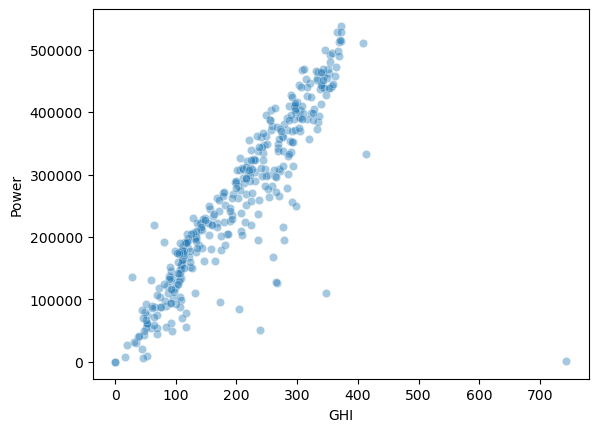

In [52]:
sns.scatterplot(Daily_Averages,x="GHI",y="Power",alpha=0.4)
plt.show()

In [55]:
#Dataframe of average weather values for each day restricted to when power generated
Daily_Dict_Data_Power = {}

for day in np.delete(np.arange(1,367),59):
    Daily_Dict_Data_Power[day] = []
    for feature in ave_features:
        Daily_Dict_Data_Power[day].append(Daily_Dict_Power[day][feature].mean())
    Daily_Dict_Data_Power[day].append(Daily_Dict_Power[day]["Power"].sum(axis=0))

Daily_Averages_Power = pd.DataFrame(Daily_Dict_Data_Power,index=ave_features_p).T

In [56]:
Daily_Averages_Power.sample(3)

Temperature     Alpha  Aerosol Optical Depth  Asymmetry  Clearsky DHI  \
169    29.205488  1.050488               0.064780       0.61     75.750000   
25      7.857522  1.457434               0.028823       0.62     49.991150   
92     10.428244  1.256565               0.066504       0.63     78.435115   

     Clearsky DNI  Clearsky GHI  Dew Point         DHI         DNI  ...  \
169    784.609756    631.890244   6.370122  129.750000  569.823171  ...   
25     816.247788    353.000000  -5.175221  144.575221  365.176991  ...   
92     849.427481    604.129771  -2.261832  169.030534  388.229008  ...   

        Ozone  Relative Humidity  Solar Zenith Angle       SSA  \
169  0.324671          28.014573           48.536098  0.911037   
25   0.377823          40.222832           69.775575  0.936372   
92   0.448626          41.746641           53.978473  0.945573   

     Surface Albedo    Pressure  Precipitable Water  Wind Direction  \
169            0.21  840.207317            1.532317      136.396341   
25             0.21  851.088496            0.700000      237.415929   
92             0.21  847.259542            0.900763      140.572519   

     Wind Speed     Power  
169    2.921341  372811.0  
25     1.719469  157282.0  
92     3.931298  209606.0  

[3 rows x 21 columns]

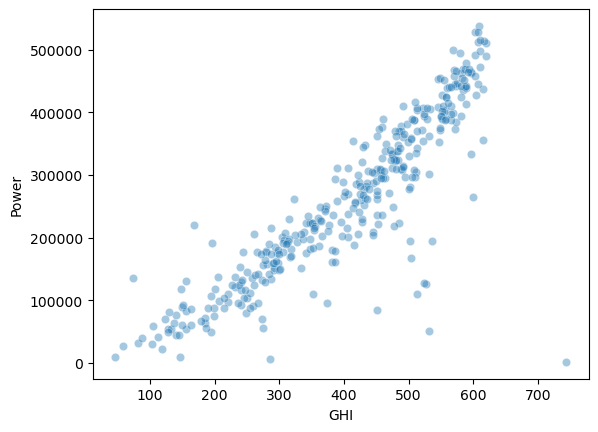

In [57]:
sns.scatterplot(Daily_Averages_Power,x="GHI",y="Power",alpha=0.4)
plt.show()

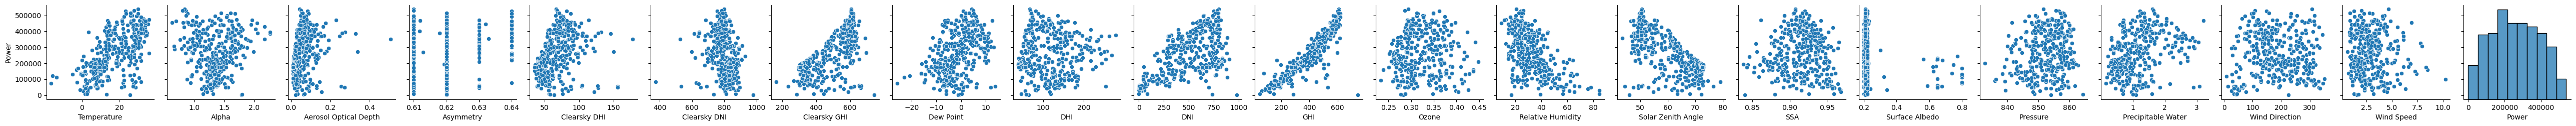

In [ ]:
#Graph power against all other features
sns.pairplot(Daily_Averages_Power, y_vars="Power")
plt.show()

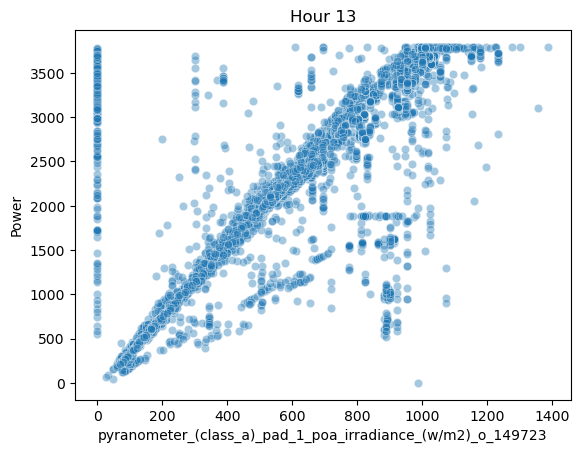

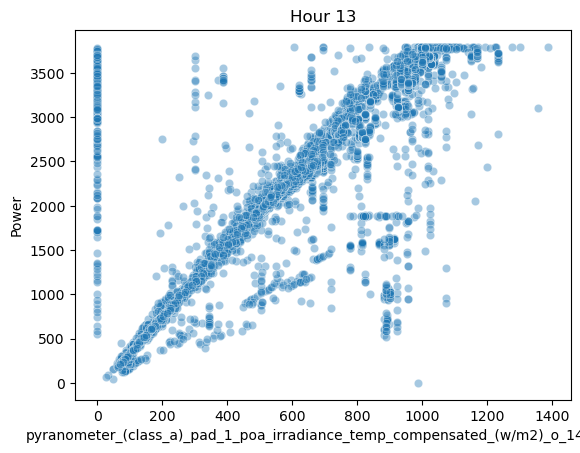

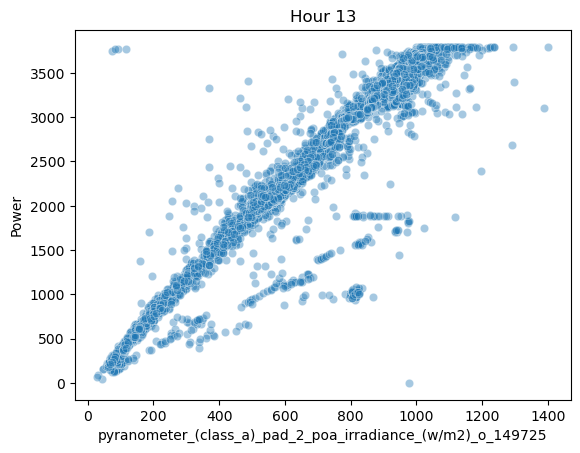

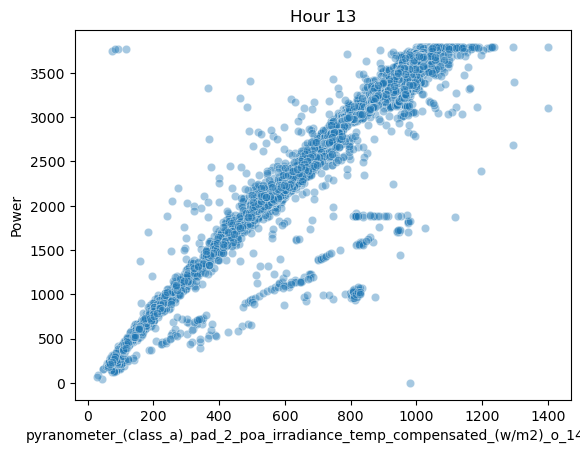

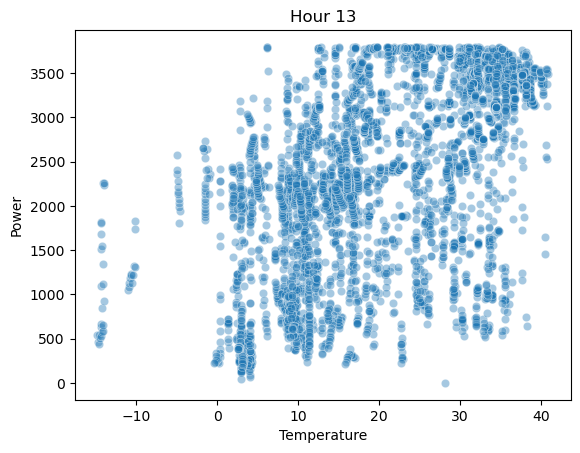

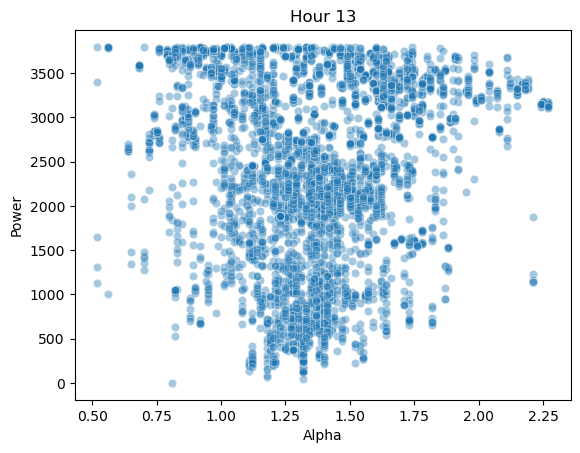

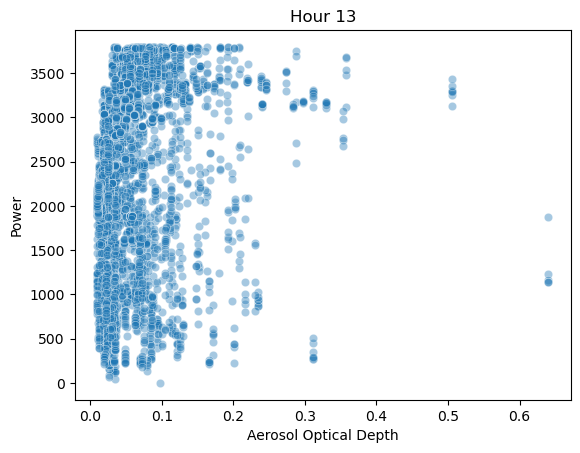

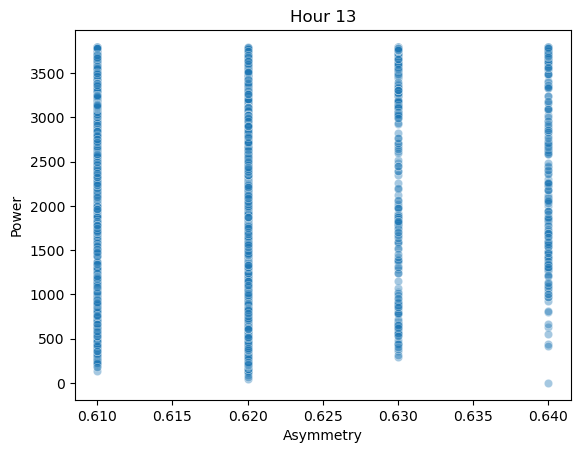

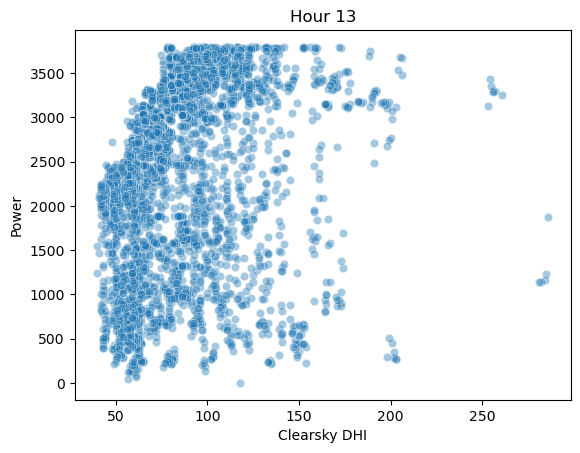

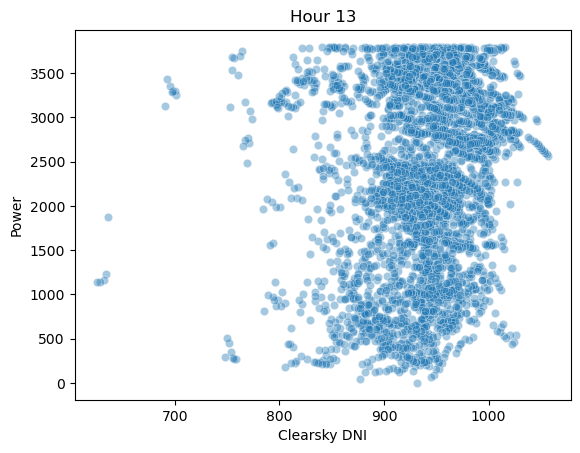

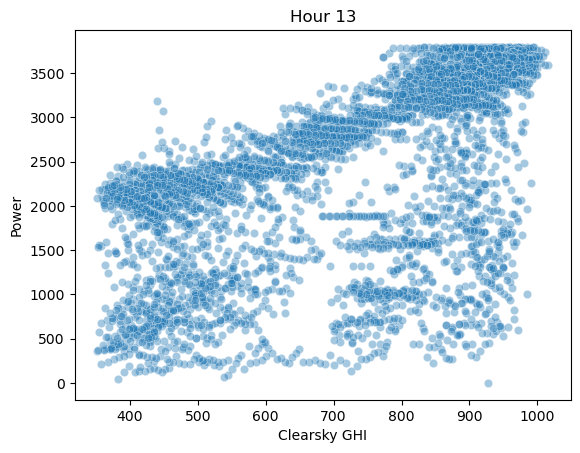

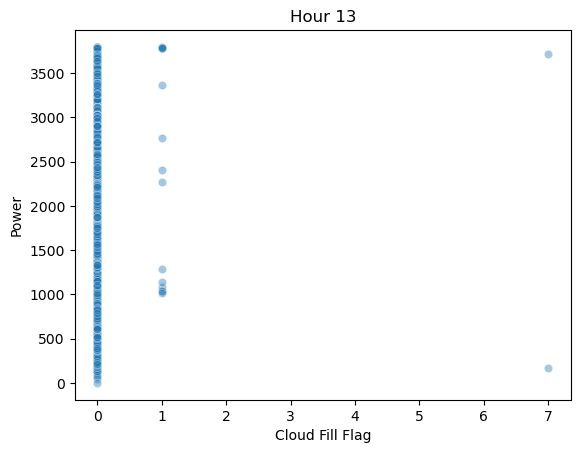

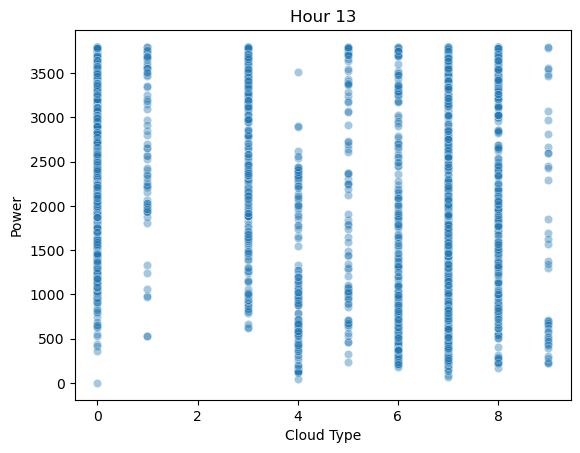

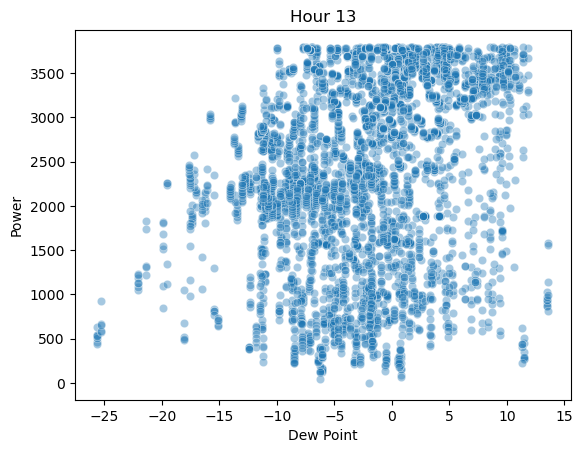

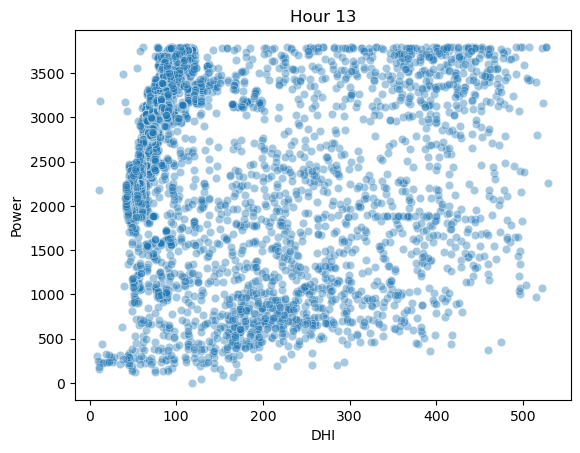

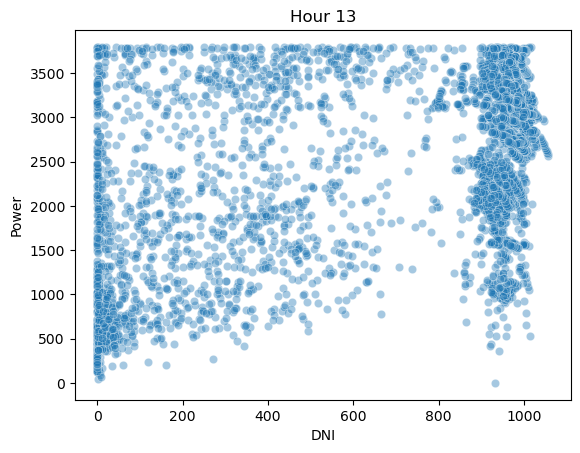

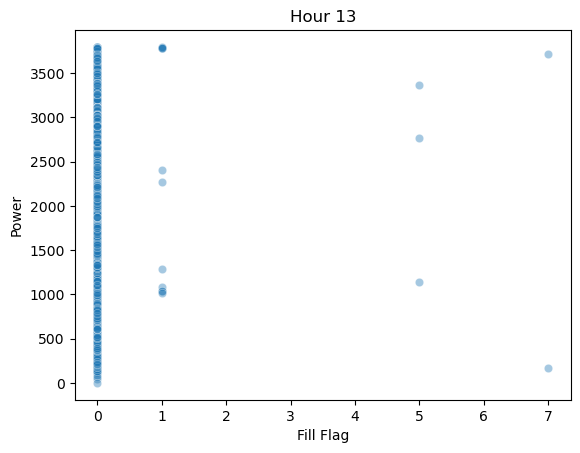

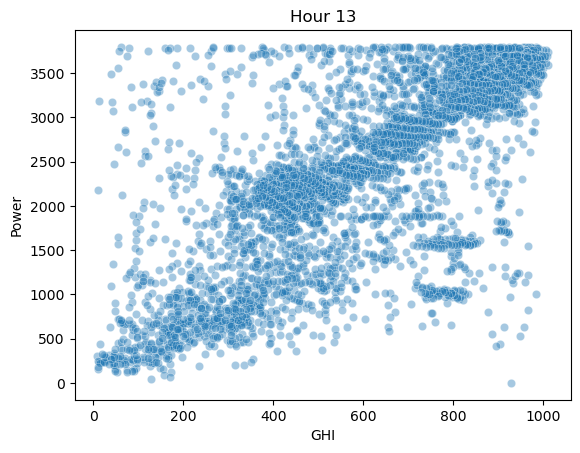

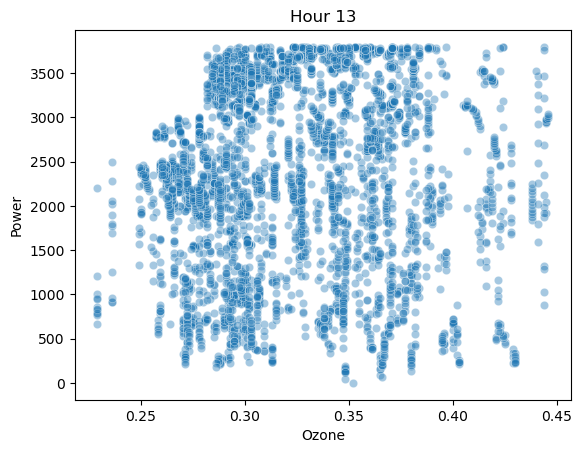

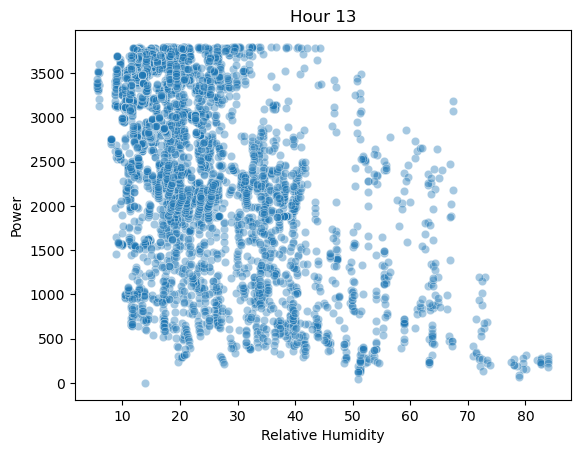

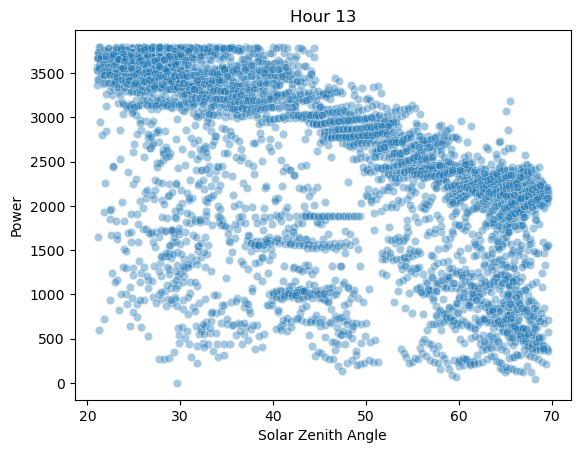

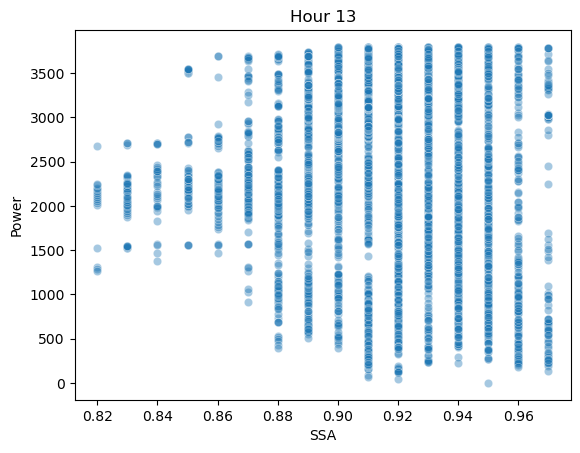

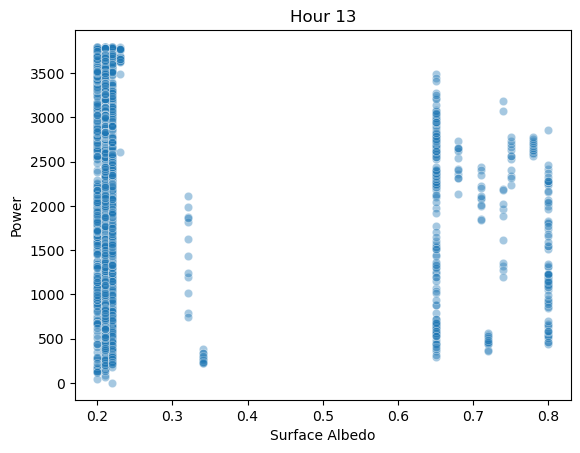

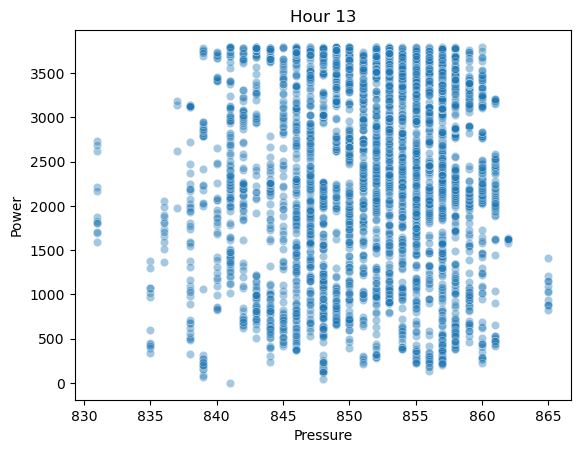

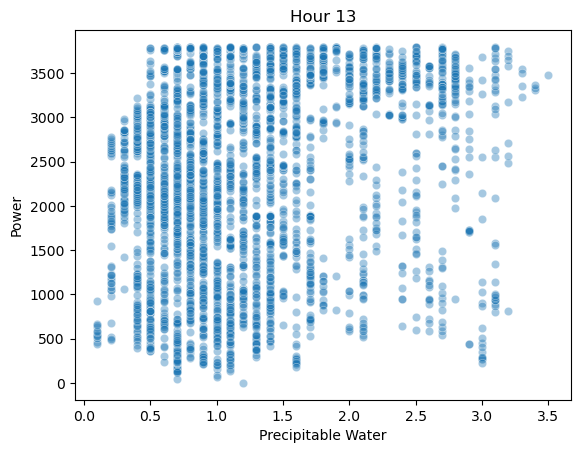

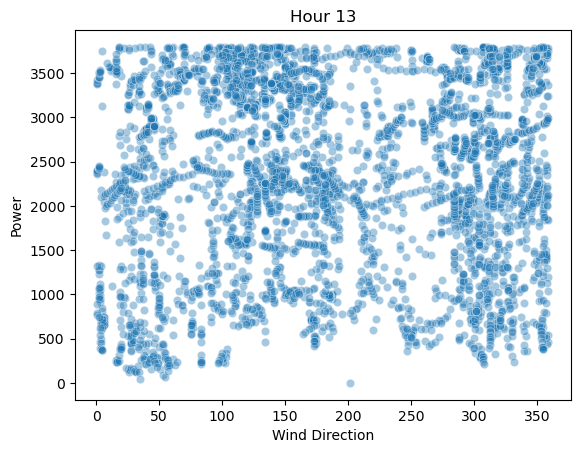

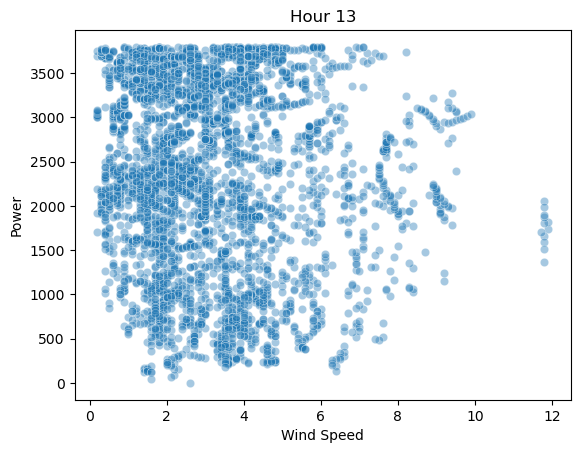

In [ ]:
#Graph all data points available against power output restricted to a specific hour
hour_view = 13

features = Merged_data.columns[1:-1]

for feature in features:
    sns.scatterplot(Hourly_Dict[hour_view],x=feature,y="Power",alpha=0.4)
    plt.title(f"Hour {hour_view}")
    plt.show()

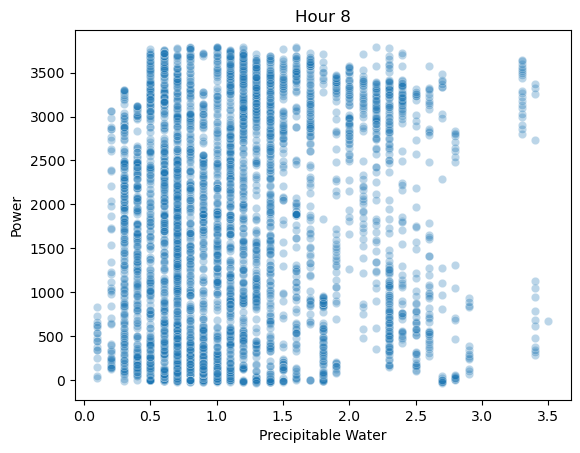

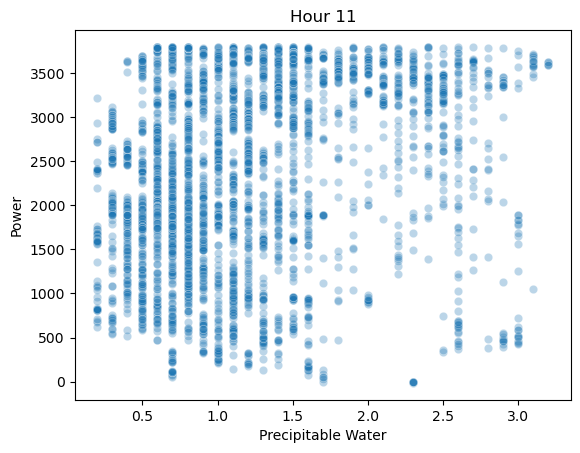

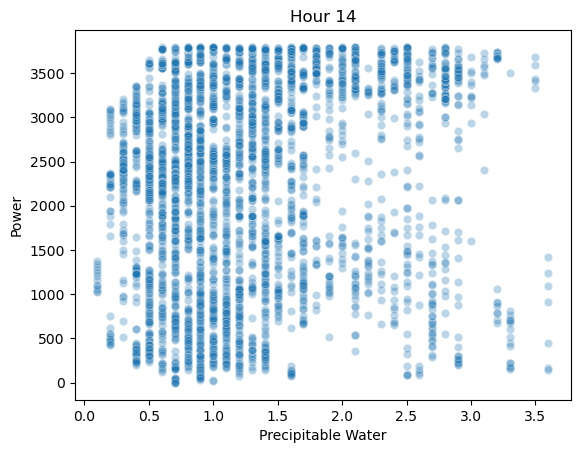

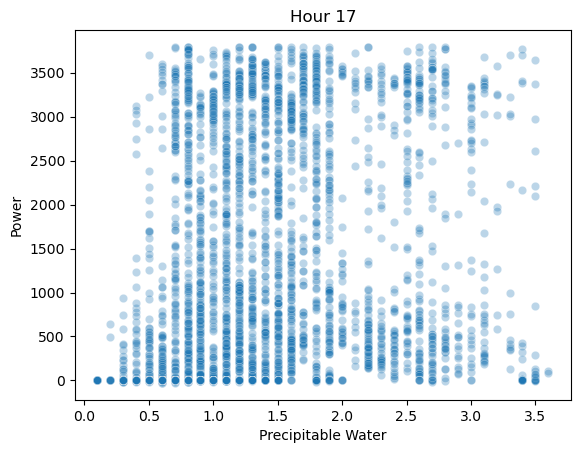

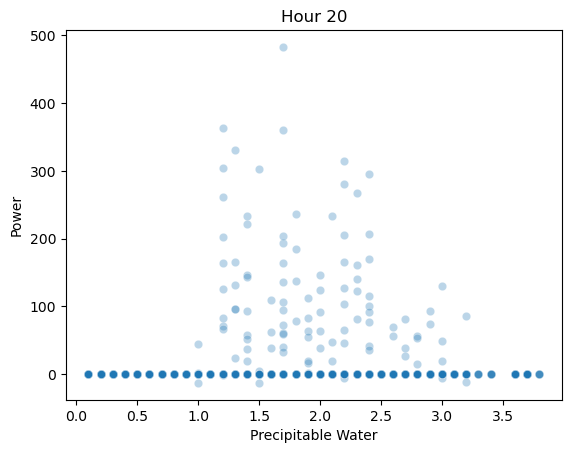

In [62]:
#Graph against power output controlling for time
start_hour = 8
stop_hour = 21
increment_hour = 3
weather_feather = "Precipitable Water"

for i in np.arange(start_hour,stop_hour,increment_hour):
    sns.scatterplot(Hourly_Dict[i],x=weather_feather,y="Power",alpha=0.3)
    plt.title(f"Hour {i}")
    plt.show()